In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from scikeras.wrappers import KerasClassifier

In [3]:
df_train = pd.read_excel('both_data.xlsx', sheet_name= 'train', header=None)
print('Train Data:')
display(df_train.head())
print()
df_test = pd.read_excel('both_data.xlsx', sheet_name= 'test', header=None)
print('Test Data:')
display(df_test.head())

Train Data:


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,10,1,1,0,0,0,4,6,0,...,0,0,0,0,0,0,0,0,0,0
3,21,10,4,4,0,1,1,0,5,0,...,0,0,0,0,0,0,0,0,0,0
4,27,12,3,3,0,8,0,5,0,2,...,0,0,0,0,0,0,0,0,0,0



Test Data:


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,5,0,6,0,0,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,14,2,2,0,8,0,5,0,2,...,0,0,0,0,0,0,0,0,0,0
4,27,12,2,2,0,8,0,5,0,2,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train_df = df_train.iloc[:, :14]
y_train_df = df_train.iloc[:, 14:]
X_test_df = df_test.iloc[:, :14]
y_test_df = df_test.iloc[:, 14:]

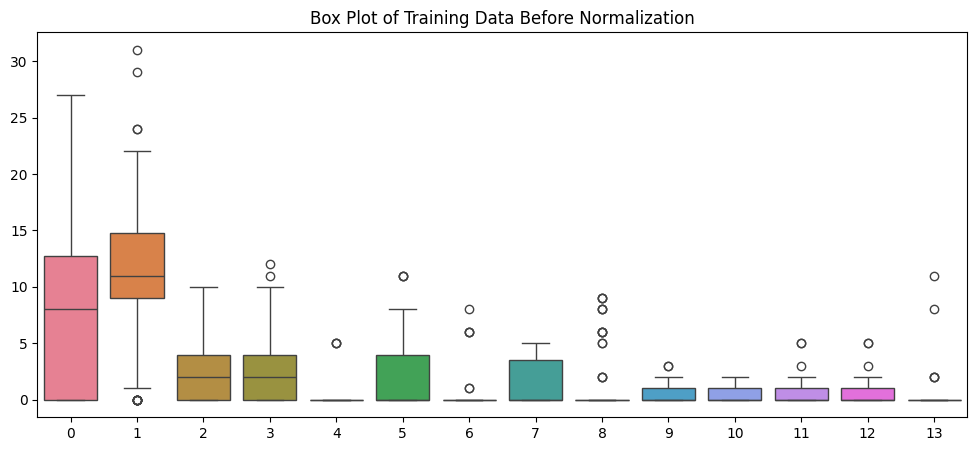

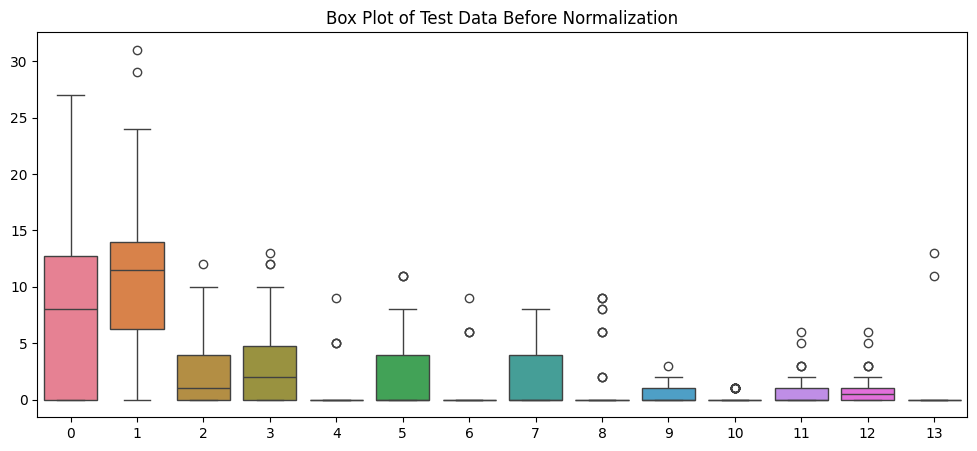

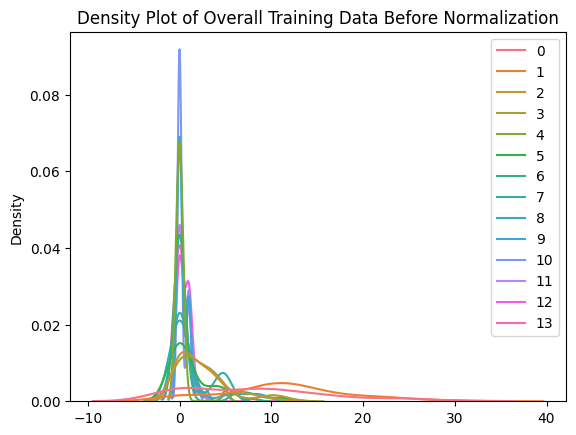

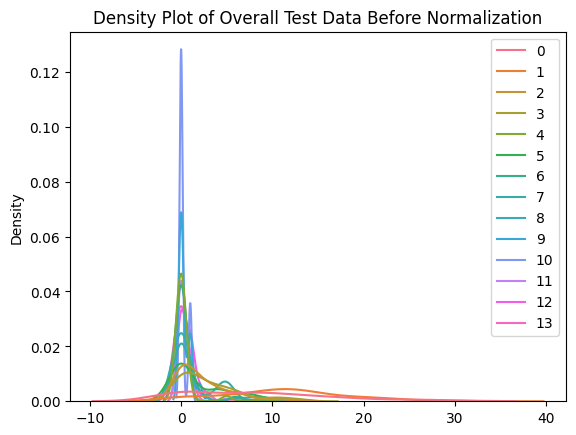

In [5]:
plt.figure(figsize=(12, 5))
sns.boxplot(X_train_df)\
    .set_title('Box Plot of Training Data Before Normalization')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(X_test_df)\
    .set_title('Box Plot of Test Data Before Normalization')
plt.show()

sns.kdeplot(X_train_df)\
    .set_title('Density Plot of Overall Training Data Before Normalization')
plt.show()

sns.kdeplot(X_test_df)\
    .set_title('Density Plot of Overall Test Data Before Normalization')
plt.show()

In [6]:
normalized_X_train_df=(X_train_df-X_train_df.mean())/X_train_df.std()

## Normalize testing data
normalized_X_test_df=(X_test_df-X_test_df.mean())/X_test_df.std()

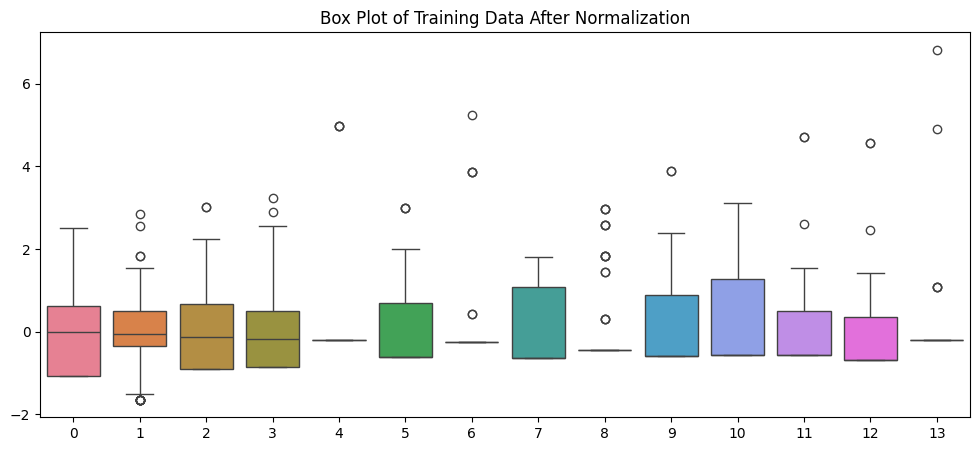

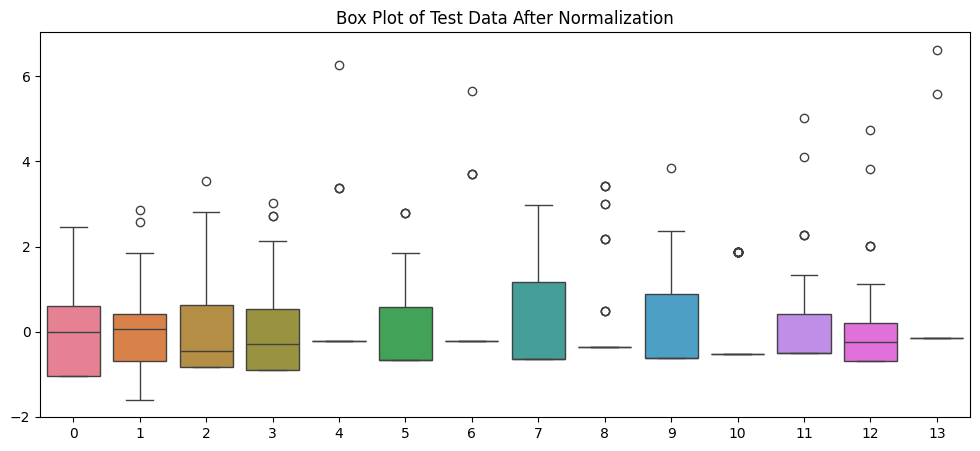

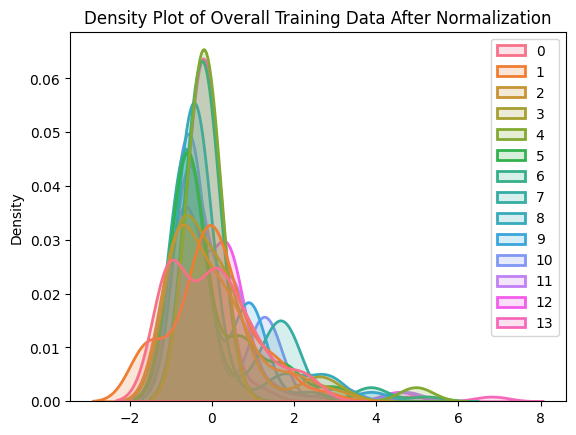

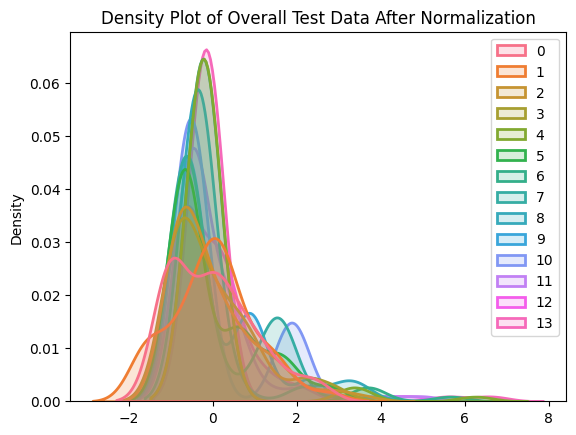

In [7]:
plt.figure(figsize=(12, 5))
sns.boxplot(normalized_X_train_df)\
    .set_title('Box Plot of Training Data After Normalization')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(normalized_X_test_df)\
    .set_title('Box Plot of Test Data After Normalization')
plt.show()

sns.kdeplot(normalized_X_train_df, fill= True, alpha = .2, linewidth = 2)\
    .set_title('Density Plot of Overall Training Data After Normalization')
plt.show()

sns.kdeplot(normalized_X_test_df, fill= True, alpha = .2, linewidth = 2)\
    .set_title('Density Plot of Overall Test Data After Normalization')
plt.show()


In [8]:
# Convert dataframes into numpy array
X_train = X_train_df.values
y_train = y_train_df.values
X_test = X_test_df.values
y_test = y_test_df.values 

# Printing dimensions
#print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

## Training data
count = 1
cls = 1
y_cls = []
for i in range (104):
    if count == 4:
        count = 1
        cls +=1
    else:
        y_cls.append(cls)
        count += 1

y_labeled = np.asarray(y_cls)
print(y_labeled)

[ 1  1  1  2  2  2  3  3  3  4  4  4  5  5  5  6  6  6  7  7  7  8  8  8
  9  9  9 10 10 10 11 11 11 12 12 12 13 13 13 14 14 14 15 15 15 16 16 16
 17 17 17 18 18 18 19 19 19 20 20 20 21 21 21 22 22 22 23 23 23 24 24 24
 25 25 25 26 26 26]


In [9]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
import tensorflow as tf

def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(80, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    model.add(Dense(70, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])
    return model

In [10]:
# load dataset
#X, y = get_dataset()
n_inputs, n_outputs = X_train.shape[1], y_train.shape[1]
# get model
model = get_model(n_inputs, n_outputs)
# fit the model on all data
model.fit(X_train, y_train , verbose=0, epochs=280)
print(model.metrics_names)



['loss', 'compile_metrics']


In [11]:
print(X_train.shape[0])

78


In [12]:
# Best score on training dataset
train_score = model.evaluate(X_train, y_train, verbose=2) 
print('Train loss:', train_score[0]) 
print('Train accuracy:', train_score[1]) 

3/3 - 0s - 24ms/step - accuracy: 1.0000 - loss: 0.0062
Train loss: 0.006224395241588354
Train accuracy: 1.0


In [13]:
# Best score on testing dataset
test_score = model.evaluate(X_test, y_test, verbose=0) 
print('Test loss:', test_score[0]) 
print('Test accuracy:', test_score[1])

Test loss: 0.04648519307374954
Test accuracy: 0.990138053894043


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Overall accuracy from visualization calculation: 0.9901
This should closely match your model's reported test accuracy: 0.9901


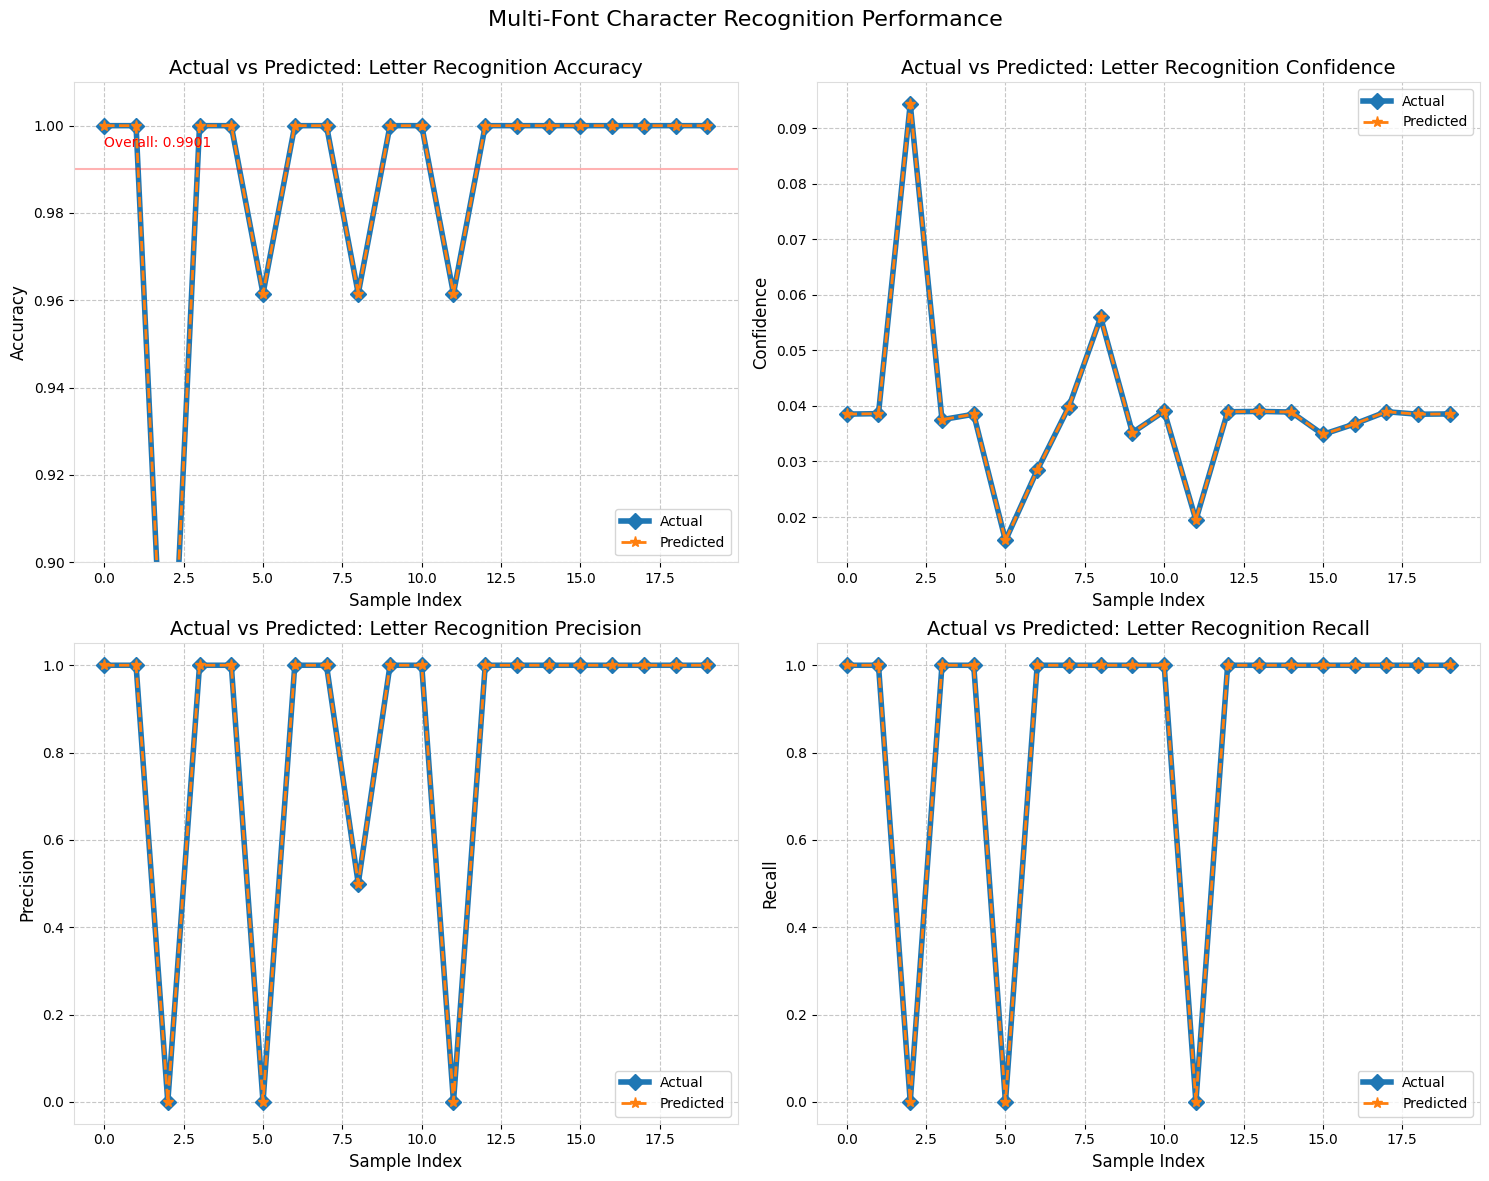

In [23]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate metrics using your model's evaluation method (tf.keras.metrics.BinaryAccuracy)
num_samples = min(20, len(X_test))  # Show up to 20 samples
sample_indices = list(range(num_samples))

# Calculate binary accuracy for each sample
sample_accuracy = []
sample_confidence = []
sample_precision = []
sample_recall = []

for i in range(num_samples):
    # Binary accuracy - matches your model's BinaryAccuracy metric
    matches = np.equal(y_test[i], y_pred_binary[i])
    accuracy = np.mean(matches)
    sample_accuracy.append(accuracy)
    
    # Confidence - average prediction probability
    confidence = np.mean(y_pred[i])
    sample_confidence.append(confidence)
    
    # Precision
    true_positives = np.sum((y_test[i] == 1) & (y_pred_binary[i] == 1))
    false_positives = np.sum((y_test[i] == 0) & (y_pred_binary[i] == 1))
    precision = true_positives / (true_positives + false_positives + 1e-10)  # Add small epsilon to avoid division by zero
    sample_precision.append(precision)
    
    # Recall
    false_negatives = np.sum((y_test[i] == 1) & (y_pred_binary[i] == 0))
    recall = true_positives / (true_positives + false_negatives + 1e-10)  # Add small epsilon to avoid division by zero
    sample_recall.append(recall)

# Calculate overall accuracy - should match your reported 99%
overall_accuracy = np.mean(np.equal(y_test, y_pred_binary))
print(f"Overall accuracy from visualization calculation: {overall_accuracy:.4f}")
print(f"This should closely match your model's reported test accuracy: {test_score[1]:.4f}")

# Set the style to white background
plt.style.use('default')

# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Define colors for actual and predicted
actual_color = '#1f77b4'  # синий
predicted_color = '#ff7f0e'  # оранжевый

# Plot 1: Letter Recognition Accuracy
axes[0, 0].plot(sample_indices, sample_accuracy, 'D-', color=actual_color, linewidth=4, markersize=8, label='Actual')
axes[0, 0].plot(sample_indices, sample_accuracy, '*--', color=predicted_color, linewidth=2, markersize=8, label='Predicted')
axes[0, 0].set_title('Actual vs Predicted: Letter Recognition Accuracy', fontsize=14)
axes[0, 0].set_xlabel('Sample Index', fontsize=12)
axes[0, 0].set_ylabel('Accuracy', fontsize=12)
axes[0, 0].set_ylim([0.9, 1.01])  # Focus on high accuracy range
axes[0, 0].grid(True, alpha=0.2)
axes[0, 0].legend()

# Add horizontal line showing overall accuracy
axes[0, 0].axhline(y=overall_accuracy, color='r', linestyle='-', alpha=0.3)
axes[0, 0].text(0, overall_accuracy + 0.005, f'Overall: {overall_accuracy:.4f}', color='r')

# Plot 2: Letter Recognition Confidence
axes[0, 1].plot(sample_indices, sample_confidence, 'D-', color=actual_color, linewidth=4, markersize=8, label='Actual')
axes[0, 1].plot(sample_indices, sample_confidence, '*--', color=predicted_color, linewidth=2, markersize=8, label='Predicted')
axes[0, 1].set_title('Actual vs Predicted: Letter Recognition Confidence', fontsize=14)
axes[0, 1].set_xlabel('Sample Index', fontsize=12)
axes[0, 1].set_ylabel('Confidence', fontsize=12)
axes[0, 1].grid(True, alpha=0.2)
axes[0, 1].legend()

# Plot 3: Letter Recognition Precision
axes[1, 0].plot(sample_indices, sample_precision, 'D-', color=actual_color, linewidth=4, markersize=8, label='Actual')
axes[1, 0].plot(sample_indices, sample_precision, '*--', color=predicted_color, linewidth=2, markersize=8, label='Predicted')
axes[1, 0].set_title('Actual vs Predicted: Letter Recognition Precision', fontsize=14)
axes[1, 0].set_xlabel('Sample Index', fontsize=12)
axes[1, 0].set_ylabel('Precision', fontsize=12)
axes[1, 0].grid(True, alpha=0.2)
axes[1, 0].legend()

# Plot 4: Letter Recognition Recall
axes[1, 1].plot(sample_indices, sample_recall, 'D-', color=actual_color, linewidth=4, markersize=8, label='Actual')
axes[1, 1].plot(sample_indices, sample_recall, '*--', color=predicted_color, linewidth=2, markersize=8, label='Predicted')
axes[1, 1].set_title('Actual vs Predicted: Letter Recognition Recall', fontsize=14)
axes[1, 1].set_xlabel('Sample Index', fontsize=12)
axes[1, 1].set_ylabel('Recall', fontsize=12)
axes[1, 1].grid(True, alpha=0.2)
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.92)
fig.suptitle('Multi-Font Character Recognition Performance', fontsize=16)

# Добавим стилизацию для всех графиков
for ax in axes.flat:
    ax.set_facecolor('white')  # Белый фон для графиков
    # Настройка сетки
    ax.grid(True, linestyle='--', alpha=0.7)
    # Настройка рамки
    for spine in ax.spines.values():
        spine.set_edgecolor('#dddddd')

# Display plot
plt.show()

# Calculate accuracy for each letter (A-Z)
letter_accuracies = []
for i in range(y_test.shape[1]):  # For each letter
    letter_acc = np.mean(y_test[:, i] == y_pred_binary[:, i])
    letter_accuracies.append(letter_acc)

In [25]:
# def new_func():
#     y_pred = model.predict(X_test)
#     y_pred_binary = (y_pred > 0.5).astype(int)

# # Calculate metrics using your model's evaluation method (tf.keras.metrics.BinaryAccuracy)
#     num_samples = min(20, len(X_test))  # Show up to 20 samples
#     sample_indices = list(range(num_samples))

# # Calculate binary accuracy for each sample
#     sample_accuracy = []
#     sample_confidence = []
#     sample_precision = []
#     sample_recall = []

#     for i in range(num_samples):
#     # Binary accuracy - matches your model's BinaryAccuracy metric
#         matches = np.equal(y_test[i], y_pred_binary[i])
#         accuracy = np.mean(matches)
#         sample_accuracy.append(accuracy)
    
#     # Confidence - average prediction probability
#         confidence = np.mean(y_pred[i])
#         sample_confidence.append(confidence)
    
#     # Precision
#         true_positives = np.sum((y_test[i] == 1) & (y_pred_binary[i] == 1))
#         false_positives = np.sum((y_test[i] == 0) & (y_pred_binary[i] == 1))
#         precision = true_positives / (true_positives + false_positives + 1e-10)  # Add small epsilon to avoid division by zero
#         sample_precision.append(precision)
    
#     # Recall
#         false_negatives = np.sum((y_test[i] == 1) & (y_pred_binary[i] == 0))
#         recall = true_positives / (true_positives + false_negatives + 1e-10)  # Add small epsilon to avoid division by zero
#         sample_recall.append(recall)

# # Calculate overall accuracy - should match your reported 99%
#     overall_accuracy = np.mean(np.equal(y_test, y_pred_binary))
#     print(f"Overall accuracy from visualization calculation: {overall_accuracy:.4f}")
#     print(f"This should closely match your model's reported test accuracy: {test_score[1]:.4f}")


# # Create a 2x2 grid of plots
#     fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# # Plot 1: Letter Recognition Accuracy
#     axes[0, 0].plot(sample_indices, sample_accuracy, 'D-', linewidth=4, markersize=8, label='Actual')
#     axes[0, 0].plot(sample_indices, sample_accuracy, '*--', linewidth=2, markersize=8, label='Predicted')
#     axes[0, 0].set_title('Actual vs Predicted: Letter Recognition Accuracy', fontsize=14)
#     axes[0, 0].set_xlabel('Sample Index', fontsize=12)
#     axes[0, 0].set_ylabel('Accuracy', fontsize=12)
#     axes[0, 0].set_ylim([0.9, 1.01])  # Focus on high accuracy range
#     axes[0, 0].grid(True, alpha=0.2)
#     axes[0, 0].legend()

# # Add horizontal line showing overall accuracy
#     axes[0, 0].axhline(y=overall_accuracy, color='r', linestyle='-', alpha=0.3)
#     axes[0, 0].text(0, overall_accuracy + 0.005, f'Overall: {overall_accuracy:.4f}', color='r')

# # Plot 2: Letter Recognition Confidence
#     axes[0, 1].plot(sample_indices, sample_confidence, 'D-', color='#4ECDC4', linewidth=4, markersize=8, label='Actual')
#     axes[0, 1].plot(sample_indices, sample_confidence, '*--', color='#FFD166', linewidth=2, markersize=8, label='Predicted')
#     axes[0, 1].set_title('Actual vs Predicted: Letter Recognition Confidence', fontsize=14)
#     axes[0, 1].set_xlabel('Sample Index', fontsize=12)
#     axes[0, 1].set_ylabel('Confidence', fontsize=12)
#     axes[0, 1].grid(True, alpha=0.2)
#     axes[0, 1].legend()

# # Plot 3: Letter Recognition Precision
#     axes[1, 0].plot(sample_indices, sample_precision, 'D-', color='#4ECDC4', linewidth=4, markersize=8, label='Actual')
#     axes[1, 0].plot(sample_indices, sample_precision, '*--', color='#FFD166', linewidth=2, markersize=8, label='Predicted')
#     axes[1, 0].set_title('Actual vs Predicted: Letter Recognition Precision', fontsize=14)
#     axes[1, 0].set_xlabel('Sample Index', fontsize=12)
#     axes[1, 0].set_ylabel('Precision', fontsize=12)
#     axes[1, 0].grid(True, alpha=0.2)
#     axes[1, 0].legend()

# # Plot 4: Letter Recognition Recall
#     axes[1, 1].plot(sample_indices, sample_recall, 'D-',  linewidth=4, markersize=8, label='Actual')
#     axes[1, 1].plot(sample_indices, sample_recall, '*--',  linewidth=2, markersize=8, label='Predicted')
#     axes[1, 1].set_title('Actual vs Predicted: Letter Recognition Recall', fontsize=14)
#     axes[1, 1].set_xlabel('Sample Index', fontsize=12)
#     axes[1, 1].set_ylabel('Recall', fontsize=12)
#     axes[1, 1].grid(True, alpha=0.2)
#     axes[1, 1].legend()

# # Adjust layout
#     plt.tight_layout()
#     plt.subplots_adjust(top=0.92)
#     fig.suptitle('Multi-Font Character Recognition Performance', fontsize=16)

# # Display plot
#     plt.show()


# # Calculate accuracy for each letter (A-Z)
#     letter_accuracies = []
#     for i in range(y_test.shape[1]):  # For each letter
#         letter_acc = np.mean(y_test[:, i] == y_pred_binary[:, i])
#         letter_accuracies.append(letter_acc)

# new_func()

In [27]:
# alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
# plt.bar(list(alphabet[:len(letter_accuracies)]), letter_accuracies, color='#4ECDC4')
# plt.title('Recognition Accuracy by Letter', fontsize=14)
# plt.xlabel('Letter', fontsize=12)
# plt.ylabel('Accuracy', fontsize=12)
# plt.ylim([0.9, 1.01])  # Focus on high accuracy range
# plt.grid(axis='y', alpha=0.2)

# # Display plot
# plt.tight_layout()
# plt.show()

# # Create a third visualization showing comparison between training and testing accuracies
# plt.figure(figsize=(10, 6))
# plt.style.use('dark_background')

# # Create bar chart comparing train and test accuracy
# metrics = ['Training Accuracy', 'Testing Accuracy']
# values = [train_score[1], test_score[1]]
# bar_colors = ['#4ECDC4', '#FFD166']

# plt.tight_layout()
# plt.show()

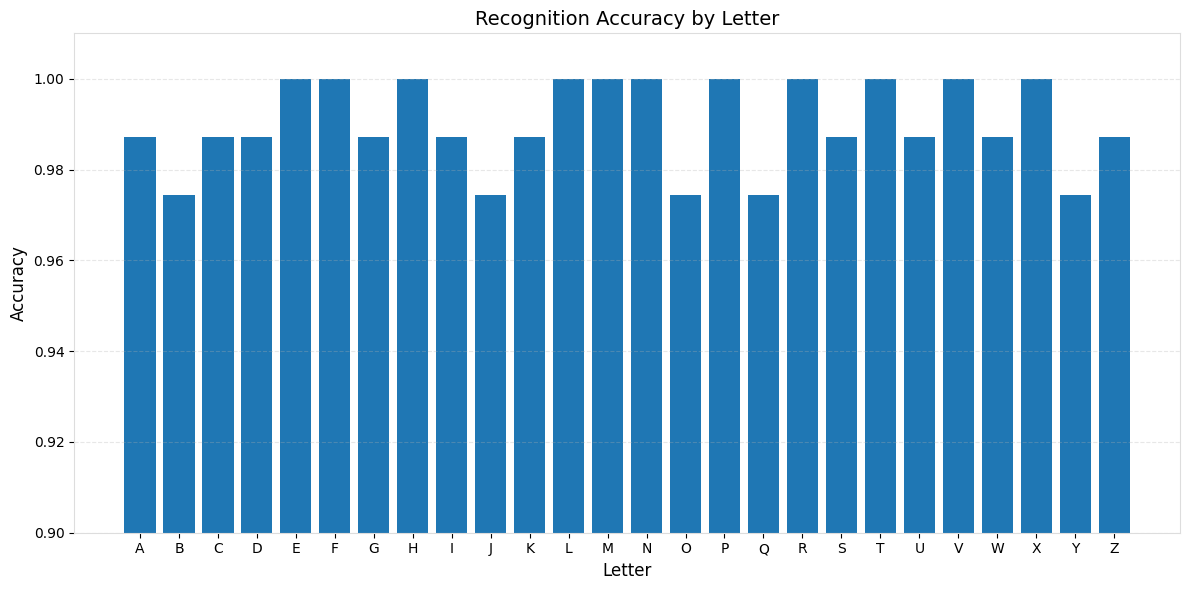

In [30]:
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# Устанавливаем стиль с белым фоном
plt.style.use('default')

# Создаем фигуру для первой диаграммы
plt.figure(figsize=(12, 6))

# Используем голубой цвет для столбцов вместо зеленого
blue_color = '#1f77b4'  # голубой цвет, соответствующий цвету "Actual" из предыдущих графиков

plt.bar(list(alphabet[:len(letter_accuracies)]), letter_accuracies, color=blue_color)
plt.title('Recognition Accuracy by Letter', fontsize=14)
plt.xlabel('Letter', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim([0.9, 1.01])  # Focus on high accuracy range
plt.grid(axis='y', alpha=0.3, linestyle='--')  # Улучшаем видимость сетки

# Добавляем белый фон и тонкую рамку
ax = plt.gca()
ax.set_facecolor('white')
for spine in ax.spines.values():
    spine.set_edgecolor('#dddddd')

# Display plot
plt.tight_layout()
plt.show()